# Diffusion musique

ARE DYNAMIC 2021-2022 -- 
*ARNOUX Constance, Anes, Chanez*

In [1]:
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Le tableau des artistes:

In [2]:
artistes = pd.read_csv("Artistes_f.csv")
artistes

,artiste,age,sexe,nationalite,nbabonnes
0,Tuerie,28,1,france,9000
1,Ksuke,32,1,japon,18800
2,Joanna,23,0,france,46000
3,Charlie Puth,25,1,amerique,60000
4,Nena,61,0,allemagne,208000
5,Renaud,69,1,france,269000
6,Amy Macdonald,34,0,ecosse,338000
7,Diam's,41,0,chypre,666000
8,Sen Senra,23,1,espagne,807000
9,Sting,70,1,angleterre,1450000


### Paramètres (determinés de manière arbitraire):

In [3]:
# effectif  du groupe
nb_public = 30

# nombre d'influenceurs en fonction de nb_public
influenceurs = nb_public//2

# proportion des abonnes des influenceurs qui ecouteront la musique
prop_influence = 0.75

# nombre d'aretes dans le graphe
nb_aretes = nb_public*2

# nombre de connexions entre des personnes de nationnalites differentes en fonction de nb_aretes
natio = nb_aretes//6

# artiste tire aleatoirement
a = random.randint(0,len(artistes)-1)
print(artistes.iloc[a]["artiste"])

# nombre de fois que l'on veut repeter l'experience
nb_f = 30

Sting


# 1. Creation du groupe et du graphe

In [4]:
def enleve_doublons(liste):
    """
    Parametre : 
        - liste = une liste de valeurs
    Renvoie la liste sans doublons
    
    On veut par exemple que les auditeurs apparaissent une seule fois dans la liste des auditeurs.
    """
    nvl = []
    for i in liste:
        if i not in nvl:
            nvl.append(i)
    return nvl

In [5]:
def groupe_aleatoire(nb,nbi):
    """
    Parametres:
        - nb = nombre de personnes dans le groupe
        - nbi = nombre d'influenceurs dans le groupe
    
    Cree un tableau d'individus qui represente le groupe.
    
    Ces individus ont:
        -un age (entre 5 et 99 ans)
        -une nationnalite(parmi les nationnalites des artistes)
        -un sexe (0 = fille et 1 = garçon)
        -une influence ou non (0 = non-influent et 1 = influent)
        
    """
    groupe = []
    
    liste_nationnalites = np.unique(artistes["nationalite"])

    for i in range(nb):
        age = random.randint(5,99)
        nationnalite = liste_nationnalites[random.randint(0,len(liste_nationnalites)-1)]
        sexe = random.randint(0,1)
        groupe.append([age,nationnalite,sexe,0])

    for _ in range(nbi):
        ide = random.randint(0,nb-1)
        while (groupe[ide][3] == 1):
            ide = random.randint(0,nb-1)

        groupe[ide][3] = 1

    return groupe

In [6]:
def create_graph_nat(s,nvl,nvliens):
    """
    Parametres:
        - s = tableau representant le groupe
        - nvl = nombre de liens entre les individus
        - nvliens = nombre de liens entre des individus de nationnalite differentes
        
    Cree un graphe avec l liens aleatoires entre les individus de s.
    Dans un premier temps, les individus de nationnalites differentes ne peuvent pas etre liees entre eux.
    Dans usn second temps, nvliens sont ajoutes entre des personnes toutes les personnes du graphe 
    sans tenir compte de leur nationnalites.
    """
    G = nx.Graph()
    for i in range(1,len(s)):
        G.add_node(i)
        
    for k in range(nvl):
        i = random.randint(0,(len(s)-1))
        j = random.randint(0,(len(s)-1))
        
        id_repere = 0
        while (((i == j) or (s[i][1]!=s[j][1])) and (id_repere<len(s)-1)):
            id_repere +=1 
            i = random.randint(0,(len(s)-1))
            
        
        if(id_repere<len(s)-1):
            if (s[i][3]==1):
                G.add_edge(i,j)
            elif (s[j][3]==1):
                G.add_edge(j,i)
            else:
                G.add_edge(i,j)
                G.add_edge(j,i)
            
    for l in range(nvliens):
        i = random.randint(0,(len(s)-1))
        j = random.randint(0,(len(s)-1))
        
        id_r=0
        while ((i == j) and id_r < len(s)-1):
            i = random.randint(0,(len(s)-1))
            id_r += 1
        
        
        if (id_r < len(s)-1):
            G.add_edge(i,j)
            G.add_edge(j,i)
        

        
    return G

#### Etape 0 du graphe

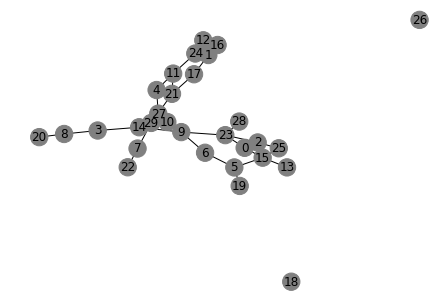

In [7]:
gr = groupe_aleatoire(nb_public,influenceurs)

couleurs_sommets=["grey"]*len(gr)

g = create_graph_nat(gr,nb_aretes,natio)
nx.draw(g,node_color= couleurs_sommets, with_labels=True)

Les influenceurs sont en jaunes et les autres individus sont en gris.
Le numero correspondent aux identifiant des individus.

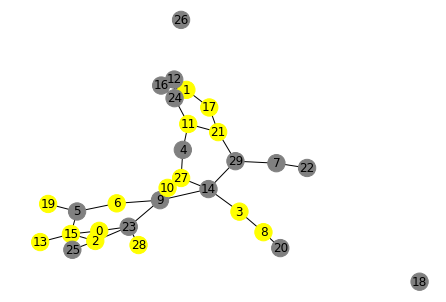

In [8]:
for k in range(len(gr)):
    if gr[k][3]==1:
           couleurs_sommets[k-1] = "yellow"

nx.draw(g,node_color= couleurs_sommets, with_labels=True)

# 2. Calculs des premiers auditeurs

In [9]:
def nb_ecoutes(a,nb_public):
    """
    Parametres:
        - a = indice de l'artiste etudie
        - nb_public = nombre d'individus dans le groupe
    Renvoie le nombre d'individus du groupe qui ecoute l'artiste etudie.
    Les intervalles sont determines de maniere arbitraire tout comme la proportion des auditeurs.
        
    """
    nb_abo = int(artistes.iloc[a]["nbabonnes"])
    nb_ecoutes = 0
    if (nb_abo<10000):
        nb_ecoutes = nb_public*4/100
    elif (nb_abo<50000):
        nb_ecoutes = nb_public*5/100
    elif (nb_abo<300000):
        nb_ecoutes = nb_public*15/100
    elif (nb_abo<700000):
        nb_ecoutes = nb_public*25/100
    elif (nb_abo<1500000):
        nb_ecoutes = nb_public*35/100
    elif (nb_abo<5000000):
        nb_ecoutes = nb_public*45/100
    else:
        nb_ecoutes = nb_public*55/100
    return nb_ecoutes

In [10]:
def liste_auditeurs(nb_e,nb_public):
    """ 
    Parametres:
        - nb_e = nombre d'individus qui ecoute l'artiste d'etude
        - nb_public = nombre d'individus dans le public
    Retourne la liste cree aleatoirement des identifiants des nb_e premiers auditeurs.
    """
    abonnes = []
    for i in range(nb_e):
        individu = random.randint(0,nb_public)
        while individu in abonnes:
            individu = random.randint(0,nb_public)
        abonnes.append(individu)
    return enleve_doublons(abonnes)

nb_e est nombre d'individus qui ecoute l'artiste d'etude.
id_auditeurs est la liste d'identifiants des auditeurs qui ecoutent l'artiste.
auditeurs est la liste des auditeurs.

In [11]:
nb_e = round(nb_ecoutes(a,nb_public))+1

id_auditeurs = liste_auditeurs(nb_e,nb_public-1)

auditeurs = []
for k in id_auditeurs:
    auditeurs.append(gr[k])
nb_e

11

#### Etape 1 du graphe

Les influenceurs sont en jaunes et les autres individus sont en gris.
Les influenceurs qui ont ecoutes la nouvelle musique sont en orange et les autres qui ont ecoutes la musique sont en rouge.
Le numero correspondent aux identifiant des individus.

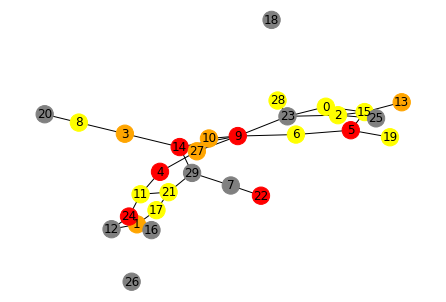

In [12]:
for a in id_auditeurs:
    if (gr[a][3]==1):
        couleurs_sommets[a-1] = "orange"
    else:
        couleurs_sommets[a-1] = "red"
        
nx.draw(g,node_color= couleurs_sommets, with_labels = True)

# 3. Diffusion : calculs des nouveaux auditeurs

Nombre d'influenceurs qui ont ecoute la musique et qui vont participer a la diffusion de celle-ci.

In [13]:
np.sum([auditeurs[j][3] for j in range(nb_e)])

5

In [14]:
def nv_auditeurs(auditeurs,p,g,gr, nouveaux):
    """
    Parametres:
        - auditeurs = liste des identifiants des auditeurs
        - p = proportion des voisins/abonnes des influenceurs qui vont ecouter la musique
        - g = graphe du groupe
        - gr = groupe
        - nouveaux = 0 pour afficher tous les auditeurs, 1 pour n'afficher que les nouveaux
        
    Renvoie une liste composée des identifiants des nouveaux auditeurs ou de tous les auditeurs.
    """
    voisins_audi = auditeurs.copy()
    nv_voisins = []
    
    for a in range(len(gr)):
       
        if ((gr[a][3]==1) and (a in auditeurs)):
            voisins = [v for v in g.neighbors(a)]
            
            nb_vois = round(len(voisins)*p)
            if (nb_vois==0):
                nb_vois+=1
            
            for n in range (nb_vois):
                
                nv = voisins[random.randint(0,len(voisins)-1)]
                if nv not in voisins_audi:
                    voisins_audi.append(nv)
                    nv_voisins.append(nv)
    if (nouveaux==1):
        return enleve_doublons(nv_voisins)
    return enleve_doublons(voisins_audi)

In [15]:
def exp(audi,groupe,g,couleurs,dess,prop):
    """
    Parametres:
        - audi = liste des identifiants auditeurs
        - groupe = tableau des individus
        - g = graphe
        - gr = groupe
        - couleurs = liste des couleurs des sommets
        - dess = 0 (le graphe n est pas dessine) ou 1 ( le graphe est affiche)
        - prop = proportion des abonnes qui ecoutent comme l'influenceurs
    Affiche le graphe ou retourne la liste des nouveaux auditeurs
    """
    nvaudi = nv_auditeurs(audi,prop,g,groupe,0)
    
    for ad in nvaudi:
        if (ad not in audi):
            couleurs[ad-1] = "cyan"
    if (dess):
        nx.draw(g,node_color= couleurs, with_labels = True)
    else:
        return nvaudi

#### Etape 2 du graphe

Les influenceurs sont en jaunes et les autres individus sont en gris.
Les influenceurs qui ont ecoutes la nouvelle musique sont en orange et les autres qui ont ecoutes la musique sont en rouge.
Les nouvaux auditeurs sont en bleus. 
Le numero correspondent aux identifiant des individus.

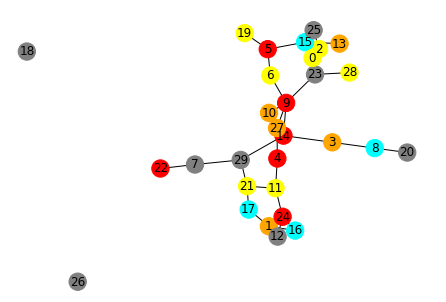

In [16]:
exp(id_auditeurs,gr,g,couleurs_sommets,1,prop_influence)

In [17]:
def repet_exp(audi,groupe,g,couleurs,prop,n,dess):
    """
    Parametres:
        - audi = liste des auditeurs
        - groupe = tableau des individus
        - g = graphe
        - couleurs = liste des couleurs des sommets
        - prop = proportion des abonnes qui ecoutent comme l'influenceurs
        - n = nombre de realisation de l experience
        - dess = 0 pour renvoyer la liste d auditeurs et 1 pour afficher le graphe
    """
    id_audi = audi.copy()
    for i in range(n):
        #exp(audi,groupe,g,couleurs,0,prop)
        id_audi += exp(id_audi,groupe,g,couleurs,0,prop)
    if (dess):
        nx.draw(g,node_color= couleurs, with_labels = True)
    else :
        return enleve_doublons(id_audi)

#### Etape 3 du graphe

Les influenceurs sont en jaunes et les autres individus sont en gris.
Les influenceurs qui ont ecoutes la nouvelle musique sont en orange et les autres qui ont ecoutes la musique sont en rouge.
Les nouvaux auditeurs sont en bleus. 
Le numero correspondent aux identifiant des individus.

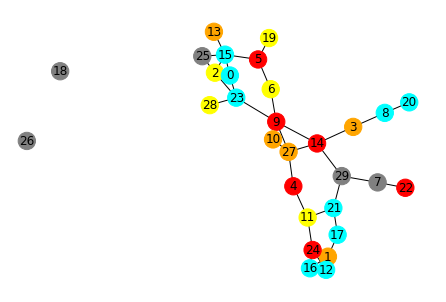

In [18]:
repet_exp(id_auditeurs,gr,g,couleurs_sommets,prop_influence,3,1)

#### Etape nb_f du graphe

Les influenceurs sont en jaunes et les autres individus sont en gris.
Les influenceurs qui ont ecoutes la nouvelle musique sont en orange et les autres qui ont ecoutes la musique sont en rouge.
Les nouvaux auditeurs sont en bleus. 
Le numero correspondent aux identifiant des individus.

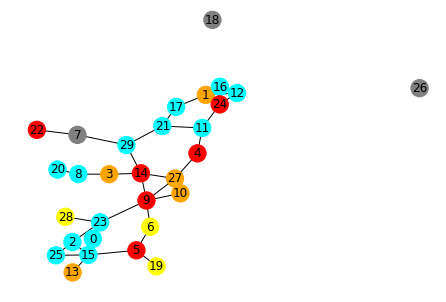

In [19]:
repet_exp(id_auditeurs,gr,g,couleurs_sommets,prop_influence,nb_f,1)

# 4. Représentation graphique :

In [20]:
def nb_etapes_tot(liste_finale,id_auditeurs,prop,g,gr):
    nb_etapes=0
    nvaudi = id_auditeurs.copy()
    
    while (len(enleve_doublons(nvaudi))!=len(liste_finale)):
        nvaudi += nv_auditeurs(nvaudi,prop,g,gr,0)
        nb_etapes += 1
    return nb_etapes

In [21]:
ecoutes_finales = repet_exp(id_auditeurs,gr,g,couleurs_sommets,prop_influence,nb_f,0)
len(ecoutes_finales)

24

In [22]:
nb_etapes_tot(ecoutes_finales,id_auditeurs,prop_influence,g,gr)

11

In [23]:
def graphe_nb_etapes(artistes,ec_fin,prop_inf,gr,g,n):
    """
    Parametres:
        - artistes = tableaux des artistes
        - prop_inf = proportion des abonnes des influenceurs qui le suive
        - gr = groupe d'individus
        - g = graphe
        - n = nombre de repetition de l'expérience

    """
    
    nb_etapes=[[] for _ in range(n)]
    nb_e_finale = [0]*len(artistes)
    
    for k in range(n):
        for art in range(len(artistes)):
            nb_e = int(nb_ecoutes(art,nb_public))
            id_auditeurs = liste_auditeurs(nb_e, nb_public)
            
            ecoutes_tot = repet_exp(id_auditeurs,gr,g,["grey"]*len(gr),prop_inf,nb_f,0)
            
            nb = nb_etapes_tot(ecoutes_tot,id_auditeurs,prop_inf,g,gr)
            
            nb_etapes[k].append(nb)
            nb_e_finale[art] += nb
    
    for res in range(len(nb_e_finale)):
        nb_e_finale[res] = round(nb_e_finale[res]/len(artistes),2)
        
    plt.plot([i for i in range(len(artistes))],nb_e_finale, color="red")

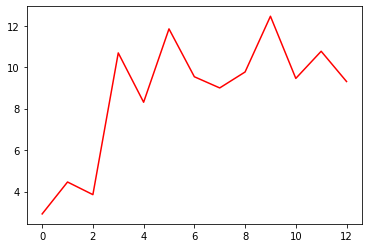

In [24]:
graphe_nb_etapes(artistes,ecoutes_finales,prop_influence,gr,g,nb_f)

In [25]:
def experience(artistes,dess,nb_public,gr,g,prop):
    """
    Parametres:
        - artistes = tableaux des artistes
        - dess = 0 pour renvoyer la liste des auditeurs ou 1 pour afficher le graphe 
        - nb_public = effectif du groupe
        - gr = groupe d'individus
        - g = graphe
    Si dess = 1, dessine le graphe avec en abscisse les identifiants des artistes et en ordonnes le nombre d'ecoutes totale
    obtenue pour une experience.
    Sinon renvoie la liste des auditeurs a l issue de l experience.
    """
    ecoutes = []
    for art in range(len(artistes)):
        nb_e = int(nb_ecoutes(art,nb_public))
        id_auditeurs = liste_auditeurs(nb_e, nb_public)
        
        ecoutes_tot = repet_exp(id_auditeurs,gr,g,["grey"]*len(gr),prop,1,0)
        
        nombre_ecoutes_finales = len(ecoutes_tot)
        #print(nombre_ecoutes_finales)
        ecoutes.append(nombre_ecoutes_finales)
   
    if not(dess):
        return ecoutes
    plt.plot([i for i in range(len(artistes))],ecoutes, color="red")


#### Graphique pour une experience

En abscisse les identifiants des artistes et en ordonnes le nombre d'ecoutes totale obtenue.

In [26]:
def moy_experiences(artistes,nb_public,gr,g,n,prop):
    """
    Parametres:
        - artistes = tableaux des artistes
        - nb_public = effectif du groupe
        - gr = groupe d'individus
        - g = graphe
        - n = nombre de realisations de l experience
    Dessine le graphe des moyennes des n graphes realises.
    """
    ecoute_moy = [0]*len(artistes)
    for i in range(n):
        ec = experience(artistes,0,nb_public,gr,g,prop)
        for k in range(len(artistes)):
            ecoute_moy[k] += ec[k]

    for j in range(len(ecoute_moy)):
        ecoute_moy[j] = ecoute_moy[j]/n
            
    plt.plot([i for i in range(len(artistes))],ecoute_moy, color="red")    

In [27]:
def var_experiences(artistes,nb_public,gr,g,n,prop):
    """
    Parametres:
        - artistes = tableaux des artistes
        - nb_public = effectif du groupe
        - gr = groupe d'individus
        - g = graphe
        - n = nombre de realisations de l experience
    Dessine le graphe des moyennes des n graphes realises.
    """
    ecoute_tot = [[] for _ in range(n)]
    ecoute_var = []
    for i in range(n):
        ec = experience(artistes,0,nb_public,gr,g,prop)
        ecoute_tot[i]=ec
        
    for i1 in range(len(ecoute_tot[0])):
        val = []
        for i2 in range(len(ecoute_tot)):
            val.append(ecoute_tot[i2][i1])
        ecoute_var.append(round(np.var(val),2))

    plt.plot([i for i in range(len(artistes))],ecoute_var, color="green")    

#### Graphique de la moyenne de plusieurs experiences

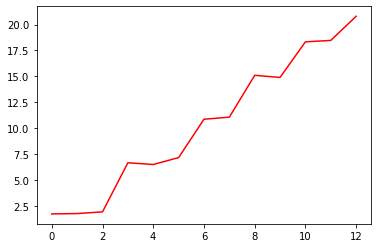

In [34]:
moy_experiences(artistes,nb_public,gr,g,nb_f,prop_influence)

#### Graphique de la variance de plusieurs experiences

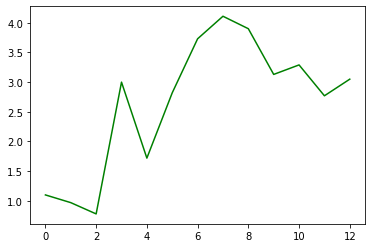

In [29]:
var_experiences(artistes,nb_public,gr,g,nb_f,prop_influence)

# 5. Alternatives :

create_graph creer un graphe qui a la difference de create_graph_nat ne prend pas en compte la nationnalite des individus

In [30]:
def create_graph(s,e):
    """
    Parametres:
        - s = groupe d'individus
        - e = nombre de liens a creer
        
    Creer un graphe avec des liens aleatoires entre les individus.
    """
    G = nx.Graph()
    for i in range(1,len(s)):
        G.add_node(i)
        
    for k in range(e):
        i = random.randint(0,(len(s)-1))
        j = random.randint(0,(len(s)-1))
        
        for l in range (e):
            if (i == j):
                i = random.randint(0,(len(s)-1))
        
        if (s[i][3]==1):
            G.add_edge(i,j)
        elif (s[j][3]==1):
            G.add_edge(j,i)
        else:
            G.add_edge(i,j)
            G.add_edge(j,i)

        
    return G

In [31]:
def nouvel_artiste(maxi,nom):
    """
    Parametres:
        - maxi = nombre maximum d abonnes
        - nom = nom de l'artiste
    une artiste caracterise par son age (entre 18 et 80 ans) , son sexe et sa nationnalite defini au hasard
    on a aussi une liste d'individus du groupe tiree aleatoirement qui ecoute l'artiste
    il ya au moins une personne abonnee
    """
    age = random.randint(18,80)
    nationnalite = random.randint(1,10)
    sexe = random.randint(0,1)
    
    nb_abonnes = random.randint(1,maxi)
    abonnes = []
    for i in range(nb_abonnes):
        individu = random.randint(0,maxi)
        while individu in abonnes:
            individu = random.randint(0,maxi)
        abonnes.append(individu)
        
    artiste = [nom,age,sexe,nationnalite, abonnes]
    return artiste

On creer un nouvel artiste au hasard. Son nombre d'abonne est aussi defini au hasard.
A la difference des autres artistes, il n'y a pas clairement affiche son nombre d'abonnes mais il y a la liste de ses abonnes.

In [32]:
artiste = nouvel_artiste(10,"Toto")
if artiste[2]==0:
    print(artiste[0]+ " a "+str(artiste[1])+" ans et elle est de nationnalite "+str(artiste[2]))
    print("Elle est suivis par "+str(artiste[4]))
else:
    print(artiste[0]+ " a "+str(artiste[1])+" ans et il est de nationnalite "+str(artiste[2]))
    print("Il est suivis par "+str(artiste[4]))

Toto a 29 ans et elle est de nationnalite 0
Elle est suivis par [2, 10, 8, 7, 4, 5, 1, 6]


On peut combiner ces deux alternatives et observer le resultat sur un graphe.
Le graphe possede beaucoup de liens, chaque personne a beaucoup plus de voisins.
Par contre, la difference entre un artiste du tableau et un artiste avec des donnes aleatoire ne se remarque pas vraiment.

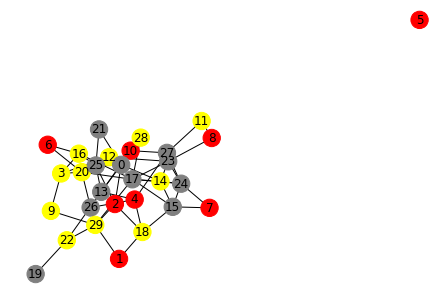

In [33]:
nv_couleurs_sommets=["grey"]*len(gr)

for k in range(len(gr)):
    if gr[k][3]==1:
           nv_couleurs_sommets[k] = "yellow"
for a in artiste[4]:
    if gr[k][3]==1:
        nv_couleurs_sommets[a-1] = "orange"
    else:
        nv_couleurs_sommets[a-1] = "red"
        
nouveau_graphe = create_graph(gr,nb_aretes)

nx.draw(nouveau_graphe,node_color= nv_couleurs_sommets, with_labels = True)